In [48]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC
import matplotlib.pyplot as plt

In [49]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [50]:
svm = Pipeline([
#     ('std',StandardScaler())
#     ('linear_svc',LinearSVC(C=np.float('inf'),loss='hinge'))
    ('svm',SVC(kernel='linear',C=0.1))
])
svm.fit(X,y)

Pipeline(memory=None,
         steps=[('svm',
                 SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [51]:
svm.predict([[5.3,1.7]])

array([1.])

In [52]:
 svm.steps[0][1].coef_, svm.steps[0][1].intercept_

(array([[1.19016375, 0.95213016]]), array([-7.4265328]))

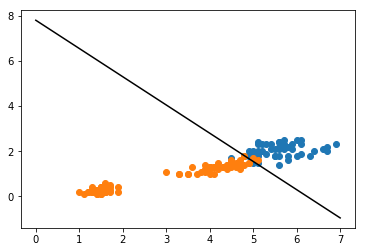

In [53]:
l2 = iris['target'] == 2
plt.plot(X[l2][:,0],X[l2][:,1],'o')
plt.plot(X[(l2-1).astype(np.bool)][:,0],X[(l2-1).astype(np.bool)][:,1],'o')
xs = np.linspace(0,7,100)
w1,w2 = tuple(svm.steps[0][1].coef_[0])
intercept = svm.steps[0][1].intercept_
decision_boundary = - w1/w2*xs - intercept/w2
plt.plot(xs,decision_boundary,'-k')

LinearSVC, LinearSVR

SVC,SVR

In [54]:
from sklearn.linear_model import SGDClassifier,SGDRegressor

$|(y - X'w) / sigma| < epsilon|(y - X'w) / sigma| > epsilon$

In [55]:
from sklearn.datasets import make_moons

In [56]:
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

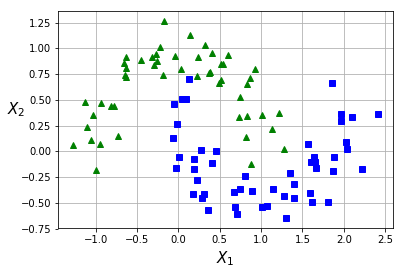

In [57]:
def plot_data(X,y):
    plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
    plt.plot(X[:,0][y==0],X[:,1][y==0],'g^')
    plt.grid(True,which='both')
    plt.xlabel(r'$X_1$',fontsize=15)
    plt.ylabel(r'$X_2$',fontsize=15,rotation=0)
plot_data(X,y)

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly_svm_clf = Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('std',StandardScaler()),
    ('svm',LinearSVC(C=10,loss='hinge',random_state=42,max_iter=5000))
])

In [60]:
poly_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=5000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [61]:
y_pred = poly_svm_clf.predict(X)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[49,  1],
       [ 2, 48]], dtype=int64)

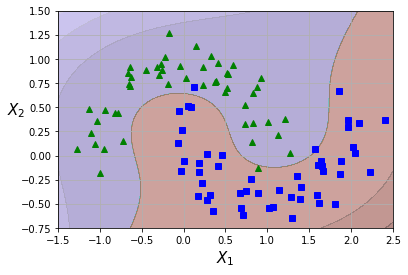

In [63]:
def plot_predicisions(clf,axes):
    xs1 = np.linspace(axes[0],axes[1],1000)
    xs2 = np.linspace(axes[2],axes[3],1000)
    x1,x2 = np.meshgrid(xs1,xs2)
    X = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X).reshape(x1.shape)
    y_decision = clf.decision_function(X).reshape(x1.shape)
    plt.contourf(x1,x2,y_pred,cmap='rainbow',alpha=0.3)
    plt.contourf(x1,x2,y_decision,cmap='binary',alpha=0.3)
#     return y_pred
    
plot_predicisions(poly_svm_clf,[-1.5,2.5,-0.75,1.5])
plot_data(X,y)

In [64]:
poly_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVC(kernel='poly',degree=3,C=5,coef0=1))
])
poly10_kernel_svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVC(kernel='poly',degree=10,C=5,coef0=100))
])

In [65]:
poly_kernel_svm_clf.fit(X,y)
poly10_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Text(0.5, 1.0, 'degree=10')

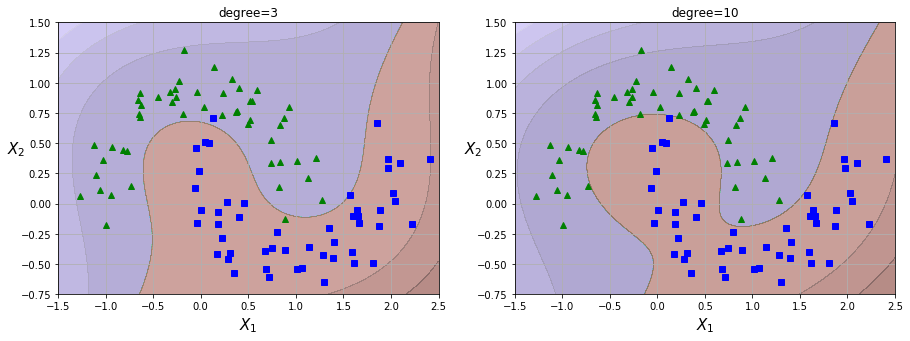

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_predicisions(poly_kernel_svm_clf,[-1.5,2.5,-0.75,1.5])
plot_data(X,y)
plt.title('degree=3')

plt.subplot(122)
plot_predicisions(poly10_kernel_svm_clf,[-1.5,2.5,-0.75,1.5])
plot_data(X,y)
plt.title('degree=10')

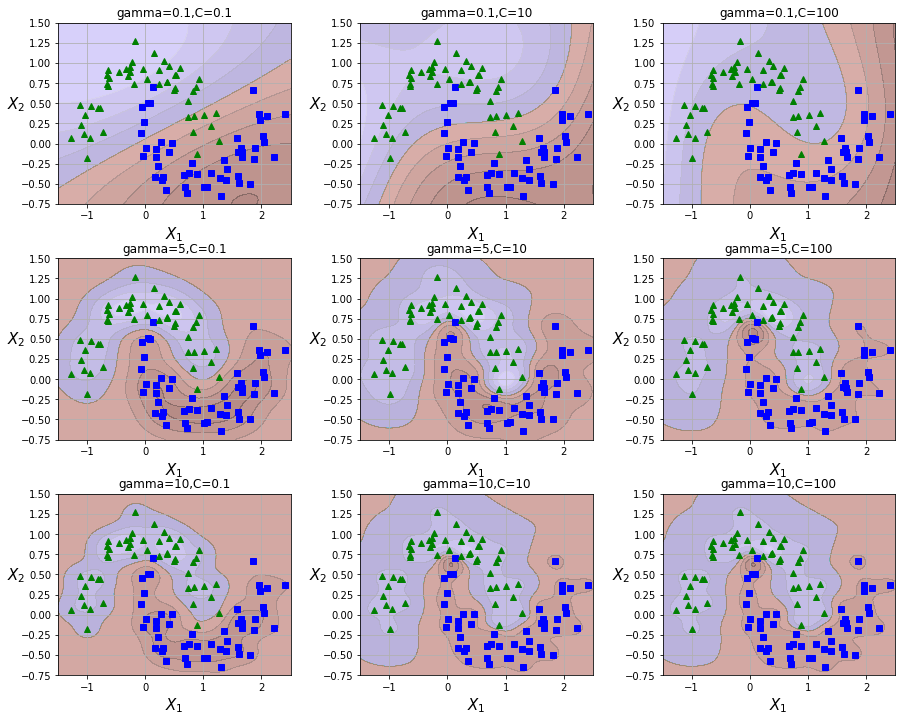

In [88]:
from itertools import product

svm_clfs = []
gammas = [0.1,5,10]
Cs = [0.1,10,100]
i = 1
plt.figure(figsize=(15,12))
for gamma,c in product(gammas,Cs):
    rbf_svm_clf = Pipeline([
        ('scaler',StandardScaler()),
        ('svm',SVC(kernel='rbf',gamma=gamma,C=c))
    ])
    rbf_svm_clf.fit(X,y)
    plt.subplot('33'+str(i))
    i += 1
    plot_predicisions(rbf_svm_clf,[-1.5,2.5,-0.75,1.5])
    plot_data(X,y)
    plt.title('gamma=%s,C=%s' % (gamma,c))
plt.gcf().subplots_adjust(hspace=0.3,wspace=0.3)